In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index_processed = pd.read_csv(r"C:\Users\haider computer s\Desktop\Sanam\Dataset\indexProcessed.csv",parse_dates=True)

In [3]:
index_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [4]:
index_processed.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [5]:
df = index_processed[['Open','High','Low','Volume','Close']]

In [6]:
df

,Open,High,Low,Volume,Close
0,2568.300049,2568.300049,2568.300049,0.0,2568.300049
1,2540.100098,2540.100098,2540.100098,0.0,2540.100098
2,2552.399902,2552.399902,2552.399902,0.0,2552.399902
3,2583.899902,2583.899902,2583.899902,0.0,2583.899902
4,2607.100098,2607.100098,2607.100098,0.0,2607.100098
...,...,...,...,...,...
104219,66054.921880,66812.453130,66022.976560,0.0,66076.679690
104220,66076.679690,66446.367190,66030.351560,0.0,66108.226560
104221,66108.226560,66940.250000,66102.546880,0.0,66940.250000
104222,66940.250000,67726.562500,66794.609380,0.0,67554.859380


In [7]:
print(df['Volume'].unique())

[0.000000e+00 2.570388e+08 1.344078e+08 ... 8.532000e+06 8.549300e+06
 9.490500e+06]


In [9]:
df['Volume'].value_counts()

0.000000e+00    42093
1.040000e+04       17
1.340000e+04       16
1.000000e+04       16
1.100000e+04       15
                ...  
6.541800e+06        1
7.716000e+07        1
1.889000e+09        1
3.443013e+08        1
1.051184e+08        1
Name: Volume, Length: 50561, dtype: int64

In [10]:
#import seaborn as sns
#sns.countplot(df['Volume'])

In [26]:
X = df.drop('Close', axis=1)
y = df['Close']

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
mmc = MinMaxScaler()
x = mmc.fit_transform(df)
x = pd.DataFrame(x , columns = [['Open','High','Low','Volume','Close']])

In [38]:
x

,Open,High,Low,Volume,Close
0,0.036575,0.036243,0.036713,0.0,0.036575
1,0.036164,0.035837,0.036301,0.0,0.036164
2,0.036343,0.036014,0.036480,0.0,0.036343
3,0.036802,0.036468,0.036941,0.0,0.036802
4,0.037139,0.036803,0.037279,0.0,0.037139
...,...,...,...,...,...
104219,0.960417,0.962634,0.963571,0.0,0.960734
104220,0.960734,0.957355,0.963679,0.0,0.961193
104221,0.961193,0.964477,0.964733,0.0,0.973300
104222,0.973300,0.975815,0.974842,0.0,0.982244


In [39]:
train1 = x.iloc[:int(len(X)*0.8)]
test1 = x.iloc[int(len(X)*0.8):]

In [40]:
print(len(train1),len(test1))

83379 20845


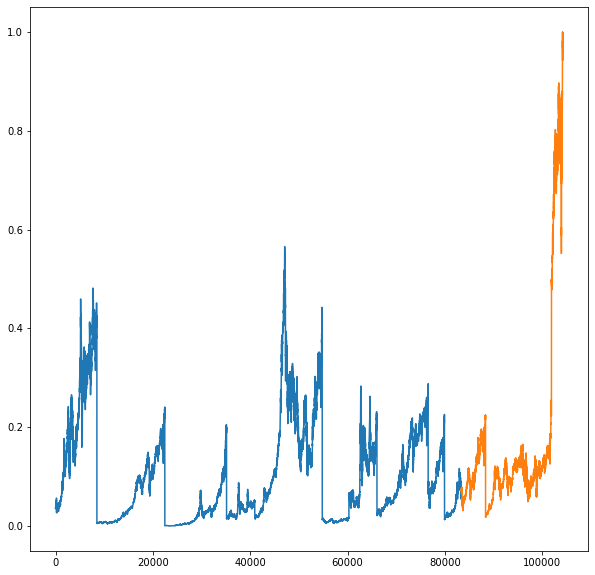

In [41]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(train1.Close)
ax.plot(test1.Close)

In [42]:
x_train1,x_test1,y_train1,y_test1 = train1.drop('Close',axis='columns'),test1.drop(['Close'],axis='columns'),train1['Close'],test1['Close']

C:\Users\haider computer s\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [43]:
x_train1

,Open,High,Low,Volume
0,0.036575,0.036243,0.036713,0.000000
1,0.036164,0.035837,0.036301,0.000000
2,0.036343,0.036014,0.036480,0.000000
3,0.036802,0.036468,0.036941,0.000000
4,0.037139,0.036803,0.037279,0.000000
...,...,...,...,...
83374,0.066991,0.066384,0.064587,0.000847
83375,0.065075,0.065915,0.064311,0.000847
83376,0.065510,0.066076,0.064659,0.000583
83377,0.066742,0.066383,0.065931,0.000639


In [44]:
from tensorflow import keras

In [49]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(4, 1)))

    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 16)
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1,1e-2, 1e-3, 1e-4,1e-5]) 

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.MeanAbsoluteError(), 
                metrics = ['accuracy'])

    return model

In [50]:
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                         objective = 'val_loss', 
                         max_epochs = 10,
                         factor = 3,)

tuner.search(x_train1, y_train1, epochs = 10, validation_data = (x_test1, y_test1))  

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [51]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [97]:
model = tuner.hypermodel.build(best_hps)
History=model.fit(x_train1, y_train1, epochs=50, validation_split=0.2)

Epoch 1/50
2085/2085 [==============================] - 5s 2ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 2/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 3/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 4/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 5/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 6/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 6.2669e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0011 -

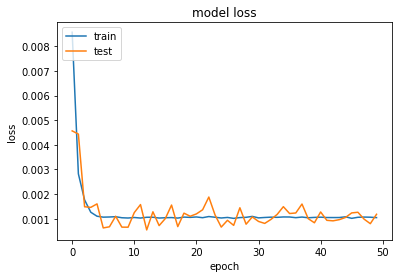

Weights saved.


In [103]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save('model.h5')
print('Weights saved.')

In [53]:
predicted = model.predict(x_test1)
y_test1_np = np.asarray(y_test1)

In [54]:
predicted.shape

(20845, 10)

In [55]:
mean_predicted = []
for i in range(len(predicted)-1):
    value = predicted[i].mean()
    mean_predicted.append(value)

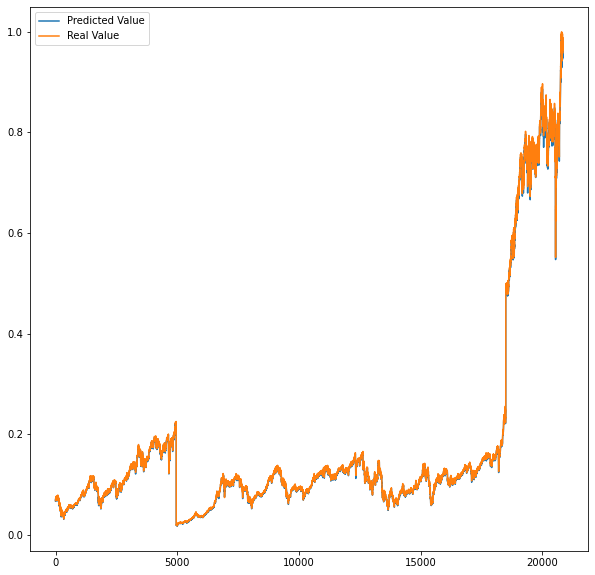

In [56]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(mean_predicted,label = 'Predicted Value')
ax.plot(y_test1_np,label = 'Real Value')
plt.legend(loc="upper left")

# Model With sigmoid(INHANCED)

In [62]:
import numpy as np
def sigmoid(u):
  
    z = np.exp(-u)
    sig = 1 / (1 + z)

    return sig
Z=sigmoid(x)

In [63]:
Z

,Open,High,Low,Volume,Close
0,0.509143,0.509060,0.509177,0.5,0.509143
1,0.509040,0.508958,0.509074,0.5,0.509040
2,0.509085,0.509003,0.509119,0.5,0.509085
3,0.509199,0.509116,0.509234,0.5,0.509199
4,0.509284,0.509200,0.509319,0.5,0.509284
...,...,...,...,...,...
104219,0.723205,0.723649,0.723836,0.5,0.723269
104220,0.723269,0.722592,0.723858,0.5,0.723361
104221,0.723361,0.724017,0.724068,0.5,0.725777
104222,0.725777,0.726277,0.726084,0.5,0.727553


In [64]:
train1 = Z.iloc[:int(len(X)*0.8)]
test1 = Z.iloc[int(len(X)*0.8):]

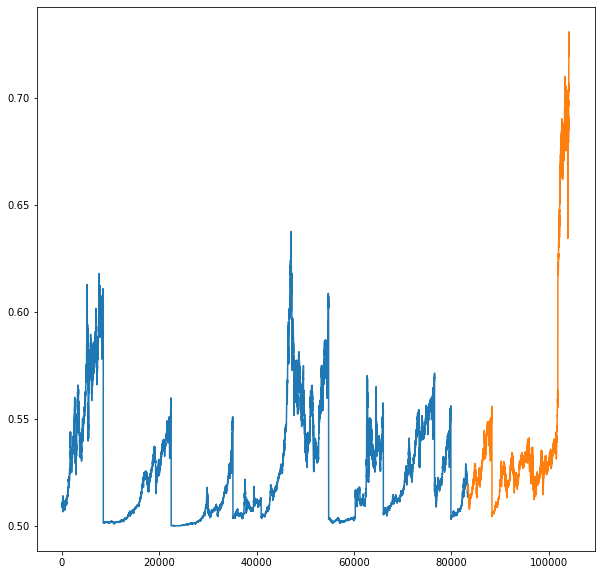

In [65]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(train1.Close)
ax.plot(test1.Close)

In [66]:
Z_train1,Z_test1,y_train1,y_test1 = train1.drop('Close',axis='columns'),test1.drop(['Close'],axis='columns'),train1['Close'],test1['Close']

C:\Users\haider computer s\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [71]:
def build_model(hp):
    Model = keras.Sequential()
    Model.add(keras.layers.Flatten(input_shape=(4, 1)))

    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 16)
    Model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    Model.add(keras.layers.Dense(10))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1,1e-2, 1e-3, 1e-4,1e-5]) 

    Model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.MeanAbsoluteError(), 
                metrics = ['accuracy'])

    return Model

In [72]:
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                         objective = 'val_loss', 
                         max_epochs = 10,
                         factor = 3,)

tuner.search(Z_train1, y_train1, epochs = 10, validation_data = (Z_test1, y_test1))  

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [73]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [87]:
Model = tuner.hypermodel.build(best_hps)
history=Model.fit(Z_train1, y_train1, epochs=50, validation_split=0.2)

Epoch 1/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0112 - accuracy: 0.0000e+00 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 2/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 3/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 4/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 5/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 6/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 7/50
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0023 - acc

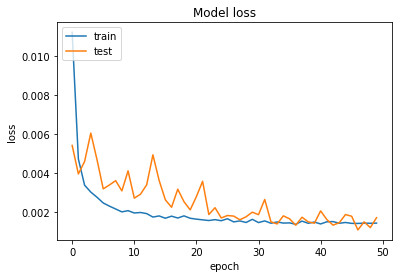

Weights saved.


In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save('Model.h5')
print('Weights saved.')

In [88]:
pred = Model.predict(Z_test1)
y_test1_np = np.asarray(y_test1)

In [89]:
pred.shape

(20845, 10)

In [90]:
mean_pred = []
for i in range(len(pred)-1):
    value = pred[i].mean()
    mean_pred.append(value)

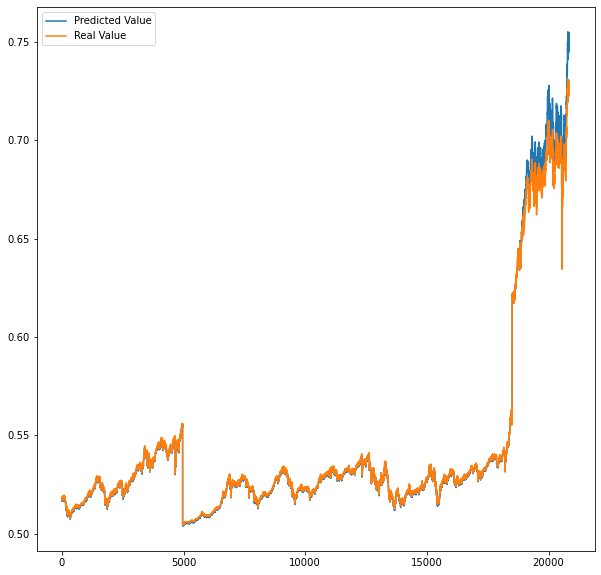

In [91]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(mean_pred,label = 'Predicted Value')
ax.plot(y_test1_np,label = 'Real Value')
plt.legend(loc="upper left")

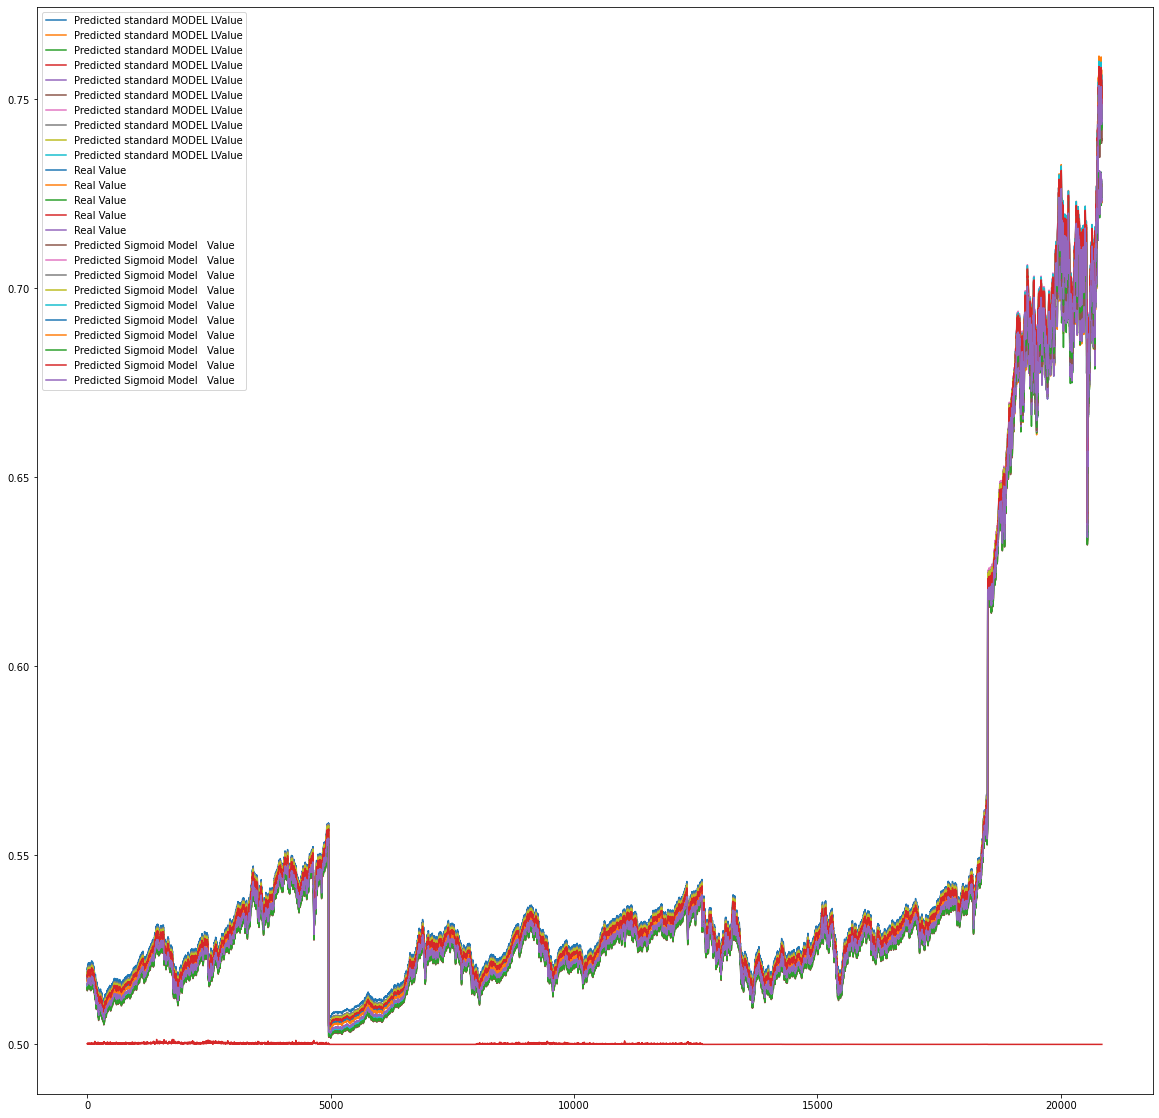

In [104]:
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(predicted,label = 'Predicted standard MODEL LValue')
ax.plot(np.array(test1),label = 'Real Value')
ax.plot(pred,label = 'Predicted Sigmoid Model   Value')
plt.legend(loc="upper left")